**1. DATA LOADING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('hardwareStore 2.csv')


In [ ]:
statistic = data.describe()
print("Basic Statistics:")
print(statistic)

Basic Statistics:
       CATEGORY_ID   PRODUCT_ID  STANDARD_COST   LIST_PRICE    REGION_ID  \
count  1112.000000  1112.000000    1112.000000  1112.000000  1112.000000   
mean      3.203237   139.579137     765.520405   950.993327     2.469424   
std       1.637782    84.840057     794.252142   991.070482     0.499289   
min       1.000000     2.000000      12.630000    15.550000     2.000000   
25%       2.000000    71.750000     332.380000   435.222500     2.000000   
50%       4.000000   133.000000     582.020000   744.980000     2.000000   
75%       5.000000   216.000000     799.050000   999.990000     3.000000   
max       5.000000   288.000000    7123.660000  8867.990000     3.000000   

       LOCATION_ID  WAREHOUSE_ID     QUANTITY  
count  1112.000000   1112.000000  1112.000000  
mean     10.971223      5.548561   107.474820  
std       4.662225      2.416821    68.008413  
min       5.000000      1.000000     0.000000  
25%       8.000000      4.000000    50.000000  
50%      

**2. Initial Data Analysis**

In [ ]:
product_Category = data.groupby('CATEGORY_NAME')['CATEGORY_ID'].sum()
print(product_Category)

CATEGORY_NAME
CPU              222
Mother Board     624
Storage         2080
Video Card       636
Name: CATEGORY_ID, dtype: int64


**3. Category Analysis**

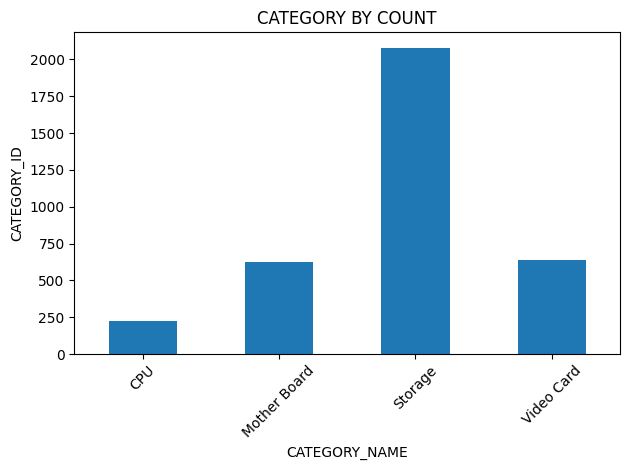

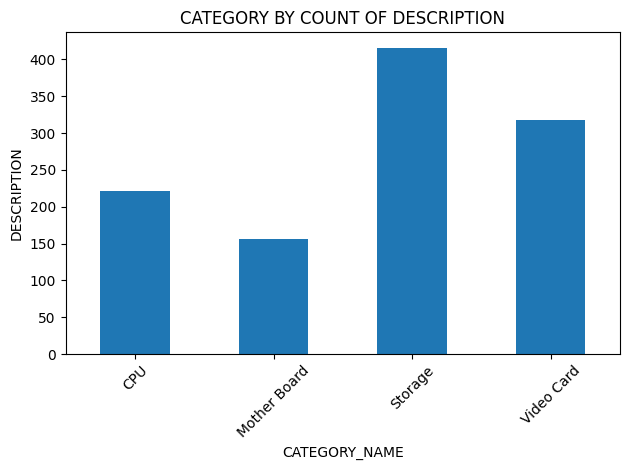

In [ ]:
product_Category = data.groupby('CATEGORY_NAME')['CATEGORY_ID'].sum()
product_Category.plot(kind = 'bar')
plt.ylabel('CATEGORY_ID')
plt.title('CATEGORY BY COUNT')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

product_Category = data.groupby('CATEGORY_NAME')['DESCRIPTION'].count()

product_Category.plot(kind = 'bar')
plt.xlabel('CATEGORY_NAME')
plt.ylabel('DESCRIPTION')
plt.title('CATEGORY BY COUNT OF DESCRIPTION')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**4. Cost and Price Analysis**

In [ ]:
avg_standard_cost = data['STANDARD_COST'].mean()
avg_list_price = data['LIST_PRICE'].mean()

highest_standard_cost_product = data.loc[data['STANDARD_COST'].idxmax()]['PRODUCT_NAME']
highest_list_price_product = data.loc[data['LIST_PRICE'].idxmax()]['PRODUCT_NAME']

print("Average Standard Cost:", avg_standard_cost)
print("Average List Price:", avg_list_price)
print("Product with highest standard cost:\n", highest_standard_cost_product)
print("Product with highest list price:\n", highest_list_price_product)

Average Standard Cost: 765.520404676259
Average List Price: 950.9933273381293
Product with highest standard cost:
 Intel SSDPECME040T401
Product with highest list price:
 Intel SSDPECME040T401


**Location Analysis**

In [ ]:
location_quantity = data.groupby(['CITY','STATE'])['QUANTITY'].sum()

highest_quantity_location = location_quantity.idxmax()

print("Location with the Highest Quantity of Product",highest_quantity_location)

Location with the Highest Quantity of Product ('South San Francisco', 'California')


**Insights and Reporting**

In [ ]:
report = """
Analysis Report
1. Data Loading and Initial Analysis:
   Basic Statistics of Dataset:
     {}

2. Data Manipulation:
   Total Revenue for each product:
     {}

3. Data Visualization:
   Bar char displaying revenue for each product is attached

4. Insights:
   The Product {} generates the highest revenue
   On average, {:.2f} units are sold per day.

highest_standard_cost_product = data.loc[data['STANDARD_COST'].idxmax()]['PRODUCT_NAME']
""". format(statistic,product_Category,avg_standard_cost,avg_list_price,highest_list_price_product,location_quantity,highest_quantity_location)

print(report)


Analysis Report
1. Data Loading and Initial Analysis:
   Basic Statistics of Dataset:
            CATEGORY_ID   PRODUCT_ID  STANDARD_COST   LIST_PRICE    REGION_ID  \
count  1112.000000  1112.000000    1112.000000  1112.000000  1112.000000   
mean      3.203237   139.579137     765.520405   950.993327     2.469424   
std       1.637782    84.840057     794.252142   991.070482     0.499289   
min       1.000000     2.000000      12.630000    15.550000     2.000000   
25%       2.000000    71.750000     332.380000   435.222500     2.000000   
50%       4.000000   133.000000     582.020000   744.980000     2.000000   
75%       5.000000   216.000000     799.050000   999.990000     3.000000   
max       5.000000   288.000000    7123.660000  8867.990000     3.000000   

       LOCATION_ID  WAREHOUSE_ID     QUANTITY  
count  1112.000000   1112.000000  1112.000000  
mean     10.971223      5.548561   107.474820  
std       4.662225      2.416821    68.008413  
min       5.000000      1.00000

**Saving the Report to File**

In [ ]:
 with open('Exploratory Data Analysis of Product Data','w') as f:
    f.write(report)